Hudobni asistent je študentom nekoč zadal takšno nalogo.

---

*Napišite funkcijo preveri(carovniki, uroki), ki za podana seznama čarovnikov in njihovih urokov preveri, ali vsak čarovnik vedno izvaja natanko enak urok.*

*Če vsak čarovnik izvaja vedno isti urok, funkcija vrne `True`. Če se kateri koli čarovnik pojavi večkrat in izvaja različne uroke, funkcija vrne `False`.*

*Ime čarovnika in njegov urok sta povezana prek istega indeksa v seznamih, kar pomeni, da carovniki[i] izvaja uroki[i].*

*Klic*

```
preveri(["Rincewind", "Cutangle", "Stibbons", "Rincewind"],
        ["Eksplodiraj", "Teleport", "Ogenj", "Nevidnost"])
```

*vrne `False`, ker je Rincewind izvedel različna uroka (*Eksplodiraj* in *Nevidnost*).*

*Klic*

```
preveri(["Rincewind", "Cutangle", "Stibbons", "Rincewind"],
        ["Eksplodiraj", "Teleport", "Ogenj", "Eksplodiraj"])
```

*vrne `True`, ker vsak čarovnik izvaja vedno isti urok.*

---

Hudobnemu asistentu je sledil še hudobnejši profesor, ki je dal študentom enako nalogo, vendar je v teste dodal primer, v katerem nastopa milijon čarovnikov in hotel, da program v največ nekaj sekundah obdela tudi te. Rešitev,  ki potrebuje več časa, se bo štela za napačno.

(Ker ni čisto hudoben, ima spoiler: potrebujete slovar, katerega ključi so čarovniki. Kaj bodo vrednosti, pa razmislite sami.)

## Rešitev brez slovarja

Najprej se spomnimo, kako reši to nalogo študent z znanjem, ki ga je dobil pri Uvodu v programiranje.

In [2]:
def preveri(carovniki, uroki):
    for carovnik1, urok1 in zip(carovniki, uroki):
        for carovnik2, urok2 in zip(carovniki, uroki):
            if carovnik1 == carovnik2 and urok1 != urok2:
                return False
    return True

Takšna rešitev deluje za kratke sezname čarovnikov in urokov, ne pa pri milijonu.

Testi pripravijo seznam za milijon čarovnikov in urokov. Kako, bomo razumeli čez nekaj tednov, tu se v to ne bomo poglabljali, kodo bomo le skopirali.

In [3]:
import random

milijon_carovnikov = [f"c{random.randint(1, 10000):05}" for _ in range(1000000)]
milijon_urokov = [f"u{carovnik[1:]}" for carovnik in milijon_carovnikov]

Koliko časa bi gornja funkcija potrebovala za pet tisoč čarovnikov in urokov?

In [11]:
import time

carovniki = milijon_carovnikov[:5000]
uroki = milijon_urokov[:5000]

zacetek = time.time()
preveri(carovniki, uroki)
print(time.time() - zacetek)

0.4881711006164551


Funkcija `time` vrne čas v sekundah od 1. januarja 1970. Za tisoč čarovnikov torej potrebujemo pol sekunde. Po neki logiki - navidez pravilni, v resnici naivni - bi za dvakrat toliko čarovnikov potrebovali dvakrat toliko časa, torej sekundo. Preverimo, ali res.

In [12]:
carovniki = milijon_carovnikov[:10000]
uroki = milijon_urokov[:10000]

zacetek = time.time()
preveri(carovniki, uroki)
print(time.time() - zacetek)

1.8263521194458008


Ne, potrebovali smo skoraj dve sekundi. Poskusimo, koliko časa potrebujemo za 2000, 4000, 8000  in tako naprej do 20000 čarovnikov.

In [13]:
stevila = list(range(2000, 20001, 2000))
casi = []
for stevilo in stevila:
    carovniki = milijon_carovnikov[:stevilo]
    uroki = milijon_urokov[:stevilo]
    zacetek = time.time()
    preveri(carovniki, uroki)
    casi.append(time.time() - zacetek)

print(casi)

[0.09334087371826172, 0.3008592128753662, 0.7040607929229736, 1.1761589050292969, 1.8217980861663818, 2.5779528617858887, 3.55436110496521, 4.595165967941284, 5.825541019439697, 7.14305305480957]


Število čarovnikov narašča linearno - vsakič jih dodamo 2000. Tudi časi naraščajo linearno? Vsakič dodamo ... dve desetinki? Štiri? Narišimo! (Uporabili bomo knjižnico `matplotlib`, ki je ne dobimo s Pythonom, temveč jo je potrebno namestiti posebej. Pri Programiranju 1 se ne bomo učili o njej, pač pa nam bo včasih prišla prav, ko bomo želeli kaj pokazati. Recimo zdaj.)

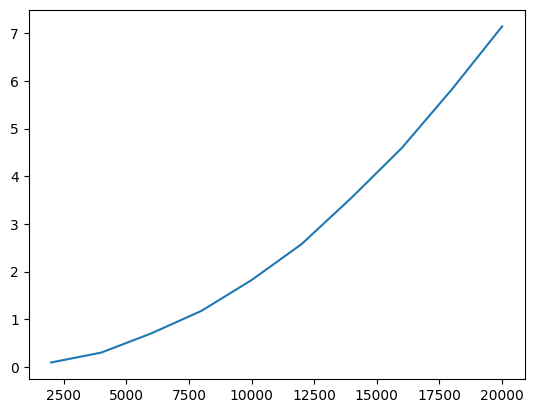

In [14]:
from matplotlib.pyplot import plot

plot(stevila, casi)

Tole ni videti kot premica, prej parabola. Če je res parabola, ima torej obliko $y = ax^2 + bx + c$. Razumno bi bilo pričakovati, da za 0 čarovnikov potrebuje 0 časa, pa tudi linearni člen bomo zaradi preprostosti tvegali prezreti. Predpostavimo torej, da sledi gornja krivulja funkciji $y = ax^2$ pri določenem $a$. Koeficient $a$ bo preprosto izračunati: če velja za vse točke, velja tudi za zadnjo. $a = y / x^2$, oziroma `a = casi[-1] / stevila[-1] ** 2`.

In [15]:
a = casi[-1] / stevila[-1] ** 2

In [16]:
y = []
for stevilo in stevila:
    y.append(a * stevilo ** 2)

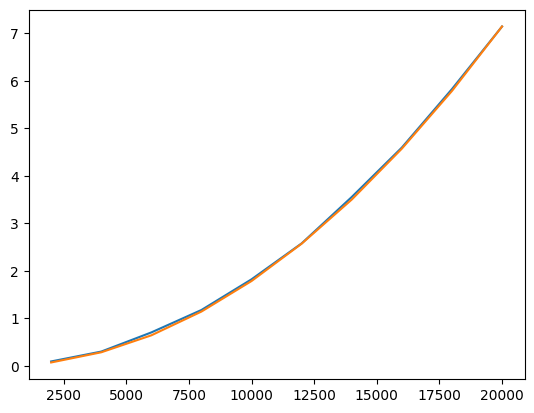

In [17]:
from matplotlib.pyplot import plot

plot(stevila, casi)
plot(stevila, y)

Krivulji odlično sovpadata. Čas, ki ga potrebuje funkcija, torej raste s kvadratom števila čarovnikov. Dvakrat več čarovnikov zahteva štirikrat večji čas. Desetkrat več čarovnikov, stokrat večji čas. Za 5000 čarovnikov potrebujemo 0.5 sekunde. Milijon čarovnikov je 200-krat več. Za 200-krat več čarovnikov potrebujemo $200 \times 200 = 40000$ več časa. 40.000-krat pol sekunde je 20000 sekund, ali tri ure.

Zakaj je tako? Reč je preprosta: imamo dve zanki, ki gresta prek vseh čarovnikov. Če je čarovnikov $x$, se zunanja zanka obrne $x$-krat in znotraj vsake iteracije zunanje zanke se tudi notranja zanka zanka obrne $x$-krat. Skupaj torej $x^2$ korakov notranje zanke.

## Rešitev s slovarjem

S slovarjem je nalogo najboljše rešiti tako.

In [18]:
def preveri(carovniki, uroki):
    uporabljeno = {}
    for carovnik, urok in zip(carovniki, uroki):
        if carovnik in uporabljeno:
            if uporabljeno[carovnik] != urok:
                return False
        else:
            uporabljeno[carovnik] = urok
    return True

Ključi slovarja so čarovniki, vrednosti urok, ki ga je ta čarovnik uporabil, ko smo ga prvič srečali.

Za vsakega čarovnika preverimo, ali je že v slovarju - se pravi, ali smo ga že videli izreči kak urok. Če je tako, preverimo, ali je izrekel enak urok kot prej. Če ga ni, brez odlašanja vrnemo `True`. Če čarovnika vidimo prvič, pa si zapomnimo urok, ki ga je uporabil.

Ne spreglejmo, kam smo postavili `else`: pod zunanji `if`, saj moramo v slovar vpisati čarovnika, ki ga še nismo videli. Če bi ga postavili pod drugi `else`, bi v slovar vpisali le čarovnika, ki *smo ga videli že poprej* in je zdaj uporabil isti urok. To ne bi delovalo; kar razmislite.

Preverimo, koliko časa potrebuje ta funkcija za različno število čarovnikov. Ker je bistveno hitrejša od prejšnje, moramo povečati število čarovnikov, sicer bo napaka meritve večja od samega časa.

In [27]:
stevila = list(range(50000, 1_000_001, 50000))
casi = []
for stevilo in stevila:
    carovniki = milijon_carovnikov[:stevilo]
    uroki = milijon_urokov[:stevilo]
    zacetek = time.time()
    preveri(carovniki, uroki)
    casi.append(time.time() - zacetek)

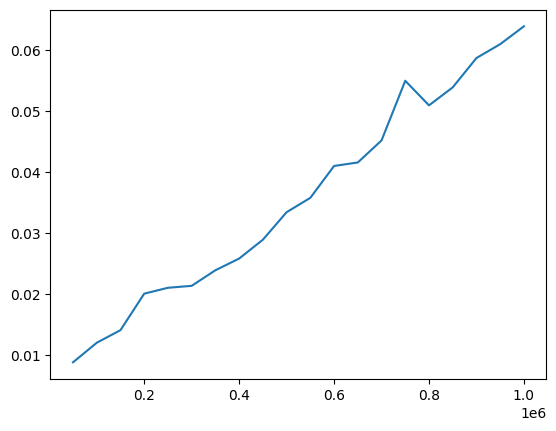

In [28]:
from matplotlib.pyplot import plot

plot(stevila, casi)

Časi so tako majhni, da jih ne izmerimo prav natančno, a vseeno: potek je - če zanemarimo slučajne skoke - videti linearen. Tako tudi mora biti: zdaj imamo eno samo zanko in vse, kar počnemo znotraj nje, je neodvisno od števila čarovnikov.